In [1]:
import os
import torch
import matplotlib.pyplot as plt

## Carga del dataset

In [2]:
from datasets.tusimple import TUSimpleDataset

BATCH_SIZE = 4
IMAGE_SIZE = (128, 64)

train_dataset = TUSimpleDataset(size=IMAGE_SIZE)
train_dataloader = torch.utils.data.DataLoader(train_dataset, BATCH_SIZE, shuffle=False)

## Entrenamiento del modelo

In [3]:
from models.scnn import SCNN
from utils import PolyLR

NUM_EPOCHS = 5

# Creación del modelo SCNN
scnn_model = SCNN(IMAGE_SIZE)

# Configurando el dispositivo con el que se ejecuta el modelo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
scnn_model.to(device)

# Definición del optimizador
optimizer = torch.optim.SGD(
    scnn_model.parameters(), lr=1e-2, momentum=0.9, weight_decay=2e-5, nesterov=True
)
lr_scheduler = PolyLR(optimizer, 0.9, max_iter=10000)

# Entrenamiento del modelo
losses_epoch, train_accuracies = scnn_model.fit(
    NUM_EPOCHS, train_dataloader, optimizer, lr_scheduler, device
)

# Guardado del modelo
torch.save(scnn_model.state_dict(), os.path.join("saved_models", "scnn_model.pth"))

d:\Users\CARLOS\Documents\Tareas y Trabajos UBB\Introducción a las aplicaciones de algoritmos de ML y DL\Proyecto Semestral\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Users\CARLOS\Documents\Tareas y Trabajos UBB\Introducción a las aplicaciones de algoritmos de ML y DL\Proyecto Semestral\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 804/804 [18:25<00:00,  1.37s/it]


Epoch 1: Loss = 0.1691, Accuracy = 0.9702


100%|██████████| 804/804 [18:09<00:00,  1.36s/it]


Epoch 2: Loss = 0.1459, Accuracy = 0.9684


100%|██████████| 804/804 [17:59<00:00,  1.34s/it]


Epoch 3: Loss = 0.1410, Accuracy = 0.9669


100%|██████████| 804/804 [18:08<00:00,  1.35s/it]


Epoch 4: Loss = 0.1382, Accuracy = 0.9661


100%|██████████| 804/804 [18:03<00:00,  1.35s/it]


Epoch 5: Loss = 0.1365, Accuracy = 0.9656


## Testeo del modelo

In [4]:
import numpy as np
from utils import accuracy_score

# Carga del dataset de test
test_dataset = TUSimpleDataset(train=False)

# Testeo del modelo
test_accuracies = []
for img, segmentation_image, _ in test_dataset:
	with torch.no_grad():
		binary_seg = scnn_model.predict(img)
	accuracy = accuracy_score(
		segmentation_image.numpy().astype(np.uint8), binary_seg.astype(np.uint8)
	)

	test_accuracies.append(accuracy)

# Promedio de accuracies de test y entrenamiento
test_accuracy = sum(test_accuracies) / len(test_accuracies)
train_accuracy = sum(train_accuracies) / len(train_accuracies)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.967446026398768
Test Accuracy: 0.968655041950505


Podemos observar que los accuracies son muy similares, por lo tanto no presenta overfitting.

## Gráficas de los resultados

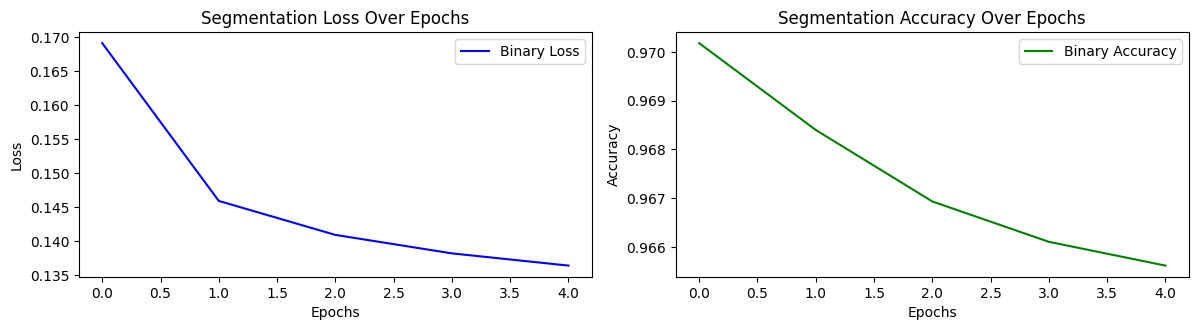

In [5]:
# Gráficas de pérdida y accuracy del entrenamiento por epochs
plt.figure(figsize=(12, 6))

# Gráfica de Loss
plt.subplot(2, 2, 1)
plt.plot(range(NUM_EPOCHS), losses_epoch, label="Binary Loss", color="b")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Segmentation Loss Over Epochs")
plt.legend()

# Gráfica de Accuracy
plt.subplot(2, 2, 2)
plt.plot(range(NUM_EPOCHS), train_accuracies, label="Binary Accuracy", color="g")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Segmentation Accuracy Over Epochs")
plt.legend()

plt.tight_layout()
plt.show()